In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_venn

In [2]:
from matplotlib_venn import venn3, venn3_circles
from matplotlib_venn import venn2, venn2_circles
%matplotlib inline

In [3]:
import networkx as nx

In [4]:
def renaming(col):
    '''
    Function to rename columns
    and change ': 'on '_' and make 
    all columns lowercase - 
    we use it in function later
    '''
    new = col.replace(': ', '_')
    new = col.replace('-', '_')   
    
    return new.lower()

In [6]:
def table_transformation(tab1):
    '''
    Functions uses Deseq2 total results datasets,
    transformes columns names, 
    and replaces NaNs with no gene, 
    uses function - renaming
    '''       
    tab1 = tab1.rename(columns = renaming)
    tab1.genename = tab1.genename.apply(lambda x: x.replace('nan','no gene'))
    tab1 = tab1.query('p_adj <= 0.05 and abs(log2_fc) >= 1.006')
    return tab1

In [7]:
def common_features(tab1, tab2):
    '''Function to find common features of two tables according to genenames'''
    colnums1 = tab1.shape[0]
    colnums2 = tab2.shape[0]    
    common = pd.DataFrame(tab1.merge(tab2, on = ['genename']))
    return common

In [8]:
#Files with information about genes obtained by us for dif. ex.gened in case of young mice vs irradiated
#genes generated by gene profiler
An1_Ir_Y = pd.read_csv('profiler_Irradiates_vs_Young.csv', sep = ',')
An1_Ir_Y.head()

,initial_alias,converted_alias,name,description,namespace
0,ENSMUSG00000086359,ENSMUSG00000086359,9630013K17Rik,RIKEN cDNA 9630013K17 gene [Source:MGI Symbol;...,"ARRAYEXPRESS,ENSG"
1,ENSMUSG00000048215,ENSMUSG00000048215,A630023P12Rik,RIKEN cDNA A630023P12 gene [Source:MGI Symbol;...,"ARRAYEXPRESS,ENSG"
2,ENSMUSG00000068036,ENSMUSG00000068036,Afdn,"afadin, adherens junction formation factor [So...","ARRAYEXPRESS,ENSG"
3,ENSMUSG00000028393,ENSMUSG00000028393,Alad,"aminolevulinate, delta-, dehydratase [Source:M...","ARRAYEXPRESS,ENSG"
4,ENSMUSG00000025270,ENSMUSG00000025270,Alas2,"aminolevulinic acid synthase 2, erythroid [Sou...","ARRAYEXPRESS,ENSG"


In [9]:
#The same profiler for old mice vs irradiated
An1_Ir_O = pd.read_csv('profiler_Irradiated_vs_old.csv', sep = ',')
An1_Ir_O.head()

,initial_alias,converted_alias,name,description,namespace
0,ENSMUSG00000045087,ENSMUSG00000045087,S1pr5,sphingosine-1-phosphate receptor 5 [Source:MGI...,"ARRAYEXPRESS,ENSG"
1,ENSMUSG00000026656,ENSMUSG00000026656,Fcgr2b,"Fc receptor, IgG, low affinity IIb [Source:MGI...","ARRAYEXPRESS,ENSG"
2,ENSMUSG00000003420,ENSMUSG00000003420,Fcgrt,Fc fragment of IgG receptor and transporter [S...,"ARRAYEXPRESS,ENSG"
3,ENSMUSG00000015314,ENSMUSG00000015314,Slamf6,SLAM family member 6 [Source:MGI Symbol;Acc:MG...,"ARRAYEXPRESS,ENSG"
4,ENSMUSG00000077714,ENSMUSG00000077714,Snord17,"small nucleolar RNA, C/D box 17 [Source:MGI Sy...","ARRAYEXPRESS,ENSG"


In [10]:
#Profiler of different expressed genes young vs old
An1_O_Y = pd.read_csv('profiler_old_vs_young.csv', sep = ',')
An1_O_Y.head()

,initial_alias,converted_alias,name,description,namespace
0,ENSMUSG00000045087,ENSMUSG00000045087,S1pr5,sphingosine-1-phosphate receptor 5 [Source:MGI...,"ARRAYEXPRESS,ENSG"
1,ENSMUSG00000035042,ENSMUSG00000035042,Ccl5,chemokine (C-C motif) ligand 5 [Source:MGI Sym...,"ARRAYEXPRESS,ENSG"
2,ENSMUSG00000079071,ENSMUSG00000079071,Slc28a2b,solute carrier family 28 member 2b [Source:MGI...,"ARRAYEXPRESS,ENSG"
3,ENSMUSG00000019982,ENSMUSG00000019982,Myb,myeloblastosis oncogene [Source:MGI Symbol;Acc...,"ARRAYEXPRESS,ENSG"
4,ENSMUSG00000015133,ENSMUSG00000015133,Lrrk1,leucine-rich repeat kinase 1 [Source:MGI Symbo...,"ARRAYEXPRESS,ENSG"


In [11]:
#Commonly known as responsible for aging genes
Aging_assoc = pd.read_csv('genage_models.csv', sep = ',')
Aging_assoc = Aging_assoc.query('organism == "Mus musculus"')
Aging_assoc.head()

,GenAge ID,symbol,name,organism,entrez gene id,avg lifespan change (max obsv),lifespan effect,longevity influence
5,6,Adcy5,adenylate cyclase 5,Mus musculus,224129.0,30.0,Increase,Anti-Longevity
12,13,Arhgap1,Rho GTPase activating protein 1,Mus musculus,228359.0,NaN,Decrease,Pro-Longevity
14,15,Arntl,aryl hydrocarbon receptor nuclear translocator...,Mus musculus,11865.0,NaN,Decrease,Pro-Longevity
23,24,Atm,Ataxia telangiectasia mutated homolog (human),Mus musculus,11920.0,NaN,Decrease,Pro-Longevity
29,30,Atr,Ataxia telangiectasia and Rad3 related,Mus musculus,245000.0,NaN,Decrease,Pro-Longevity


In [12]:
#Commonly known as responsible for aging genes

Aging_assoc2 = pd.read_csv('AgingGenesInternetSource.csv',
                          encoding="latin-1").rename(columns = {'Gene': 'genename'})
Aging_assoc2.head()

,genename,Protein,MainPhysiologicalRole,ChangewithAgeorAbnormility
0,APOE,Apolipoprotein E,"Odulation of cholesterol balance, Aggregabilit...",Pathogenesis of atherosclerosis and in Alzheim...
1,P53,Tumor protein p53,"Tumor suppression, Transcription activation,",Cancer
2,SIRT1,Sirtuin 1 protein,"Metabolism and energy homeostasis, DNA damage ...","Aging, cancer, Slow lipid metabolism"
3,DAF-16,FOXO1 transcription factor,Transcription factor,"Cell cycle arrest, apoptosis"
4,CHRNA3,Cholinergic receptor nicotinic alpha 3 subunit,Response to foreign materials such as nicotine...,"Addiction to alcohol/cocaine, Decline in nerve..."


In [13]:
#Differently expressed genes Irradiated vs young, obtained by analysis on Galaxy server
DesIrY = pd.read_csv('Irradiated_4Gy_vs_Young_2_try.csv', sep = ',')
DesIrY.head()

,GeneID,Base-mean,log2_FC,StdErr,Wald-Stats,P-value,P-adj,chr,start,stop,strand,NA,genename
0,ENSMUSG00000027469,163.781578,2.762610,0.322521,8.565684,1.070000e-17,4.740000e-14,chr2,152847963,152895321,+,protein_coding,Tpx2
1,ENSMUSG00000020649,125.830924,2.754824,0.330281,8.340845,7.380000e-17,2.440000e-13,chr12,24708240,24714146,+,protein_coding,Rrm2
2,ENSMUSG00000069267,141.160404,2.613802,0.334909,7.804506,5.970000e-15,1.130000e-11,chr13,23752266,23752886,+,protein_coding,Hist1h3b
3,ENSMUSG00000041498,61.462571,2.496060,0.355664,7.018022,2.250000e-12,1.990000e-09,chr1,136467934,136531511,+,protein_coding,Kif14
4,ENSMUSG00000009350,43.439063,2.494304,0.364874,6.836063,8.140000e-12,6.480000e-09,chr11,87793580,87804413,+,protein_coding,Mpo


In [14]:
#Differently expressed genes Irradiated vs old, obtained by analysis on Galaxy server

DesIrO = pd.read_csv('Irradiated_4Gy_vs_Old_2_try.csv', sep = ',')
DesIrO.head()

,GeneID,Base-mean,log2_FC,StdErr,Wald-Stats,P-value,P-adj,chr,start,stop,strand,NA,genename
0,ENSMUSG00000045087,360.453918,-3.917345,0.281539,-13.914029,5.210000e-44,6.940000e-40,chr9,21242911,21248443,-,protein_coding,S1pr5
1,ENSMUSG00000026656,162.460975,-3.793583,0.316518,-11.985371,4.240000e-33,2.820000e-29,chr1,170958616,170976547,-,protein_coding,Fcgr2b
2,ENSMUSG00000003420,895.482415,-2.583433,0.237638,-10.871290,1.580000e-27,7.010000e-24,chr7,45092989,45103851,-,protein_coding,Fcgrt
3,ENSMUSG00000015314,576.935293,2.415627,0.225404,10.716879,8.480000e-27,2.820000e-23,chr1,171917514,171953170,+,protein_coding,Slamf6
4,ENSMUSG00000077714,9313.492680,-1.855653,0.182282,-10.180120,2.430000e-24,6.480000e-21,chr2,144265978,144266216,-,snoRNA,Snord17


In [15]:
#Differently expressed genes old vs young, obtained by analysis on Galaxy server

DesOY = pd.read_csv('AgeQuery/Old_vs_Young_from4Gy.csv', sep = ',')
DesOY.head()

,GeneID,Base-mean,log2_FC,StdErr,Wald-Stats,P-value,P-adj,chr,start,stop,strand,NA,genename
0,ENSMUSG00000045087,413.909829,5.777552,0.312207,18.505544,1.860000e-76,2.400000e-72,chr9,21242911,21248443,-,protein_coding,S1pr5
1,ENSMUSG00000035042,4718.190379,2.770172,0.161278,17.176401,3.990000e-66,2.570000e-62,chr11,83525777,83530518,-,protein_coding,Ccl5
2,ENSMUSG00000079071,252.475682,-5.464127,0.362089,-15.090554,1.870000e-51,8.020000e-48,chr2,122484940,122528040,+,protein_coding,Gm14085
3,ENSMUSG00000019982,439.187892,-3.852188,0.274964,-14.009765,1.360000e-44,4.370000e-41,chr10,21124934,21160984,-,protein_coding,Myb
4,ENSMUSG00000015133,737.569525,2.649684,0.197514,13.415189,4.930000e-41,1.270000e-37,chr7,66258744,66388350,-,protein_coding,Lrrk1


In [16]:
#Tidying the data
TabIY = table_transformation(DesIrY)[['geneid', 'na', 'genename','chr','log2_fc']]
TabIO = table_transformation(DesIrO)[['geneid', 'na', 'genename','chr','log2_fc']]
TabOY = table_transformation(DesOY)[['geneid', 'na', 'genename','chr','log2_fc']]

In [17]:
Known = Aging_assoc.rename(columns = renaming)[['symbol', 'name', 'lifespan effect', 'longevity influence']] #[['geneid', 'na', 'genename','chr']]
Known = Known.rename(columns = {'symbol': 'genename'})
Known.head()

,genename,name,lifespan effect,longevity influence
5,Adcy5,adenylate cyclase 5,Increase,Anti-Longevity
12,Arhgap1,Rho GTPase activating protein 1,Decrease,Pro-Longevity
14,Arntl,aryl hydrocarbon receptor nuclear translocator...,Decrease,Pro-Longevity
23,Atm,Ataxia telangiectasia mutated homolog (human),Decrease,Pro-Longevity
29,Atr,Ataxia telangiectasia and Rad3 related,Decrease,Pro-Longevity


In [18]:
tab_common_IrrY_known = common_features(DesIrY, Known)
tab_common_IrrY_known

,GeneID,Base-mean,log2_FC,StdErr,Wald-Stats,P-value,P-adj,chr,start,stop,strand,NA,genename,name,lifespan effect,longevity influence
0,ENSMUSG00000040084,134.860700,1.950900,0.329777,5.915810,3.300000e-09,8.250000e-07,chr2,118598210,118641591,+,protein_coding,Bub1b,budding uninhibited by benzimidazoles 1 homolo...,Increase and Decrease,Pro-Longevity
1,ENSMUSG00000028063,85.616025,1.558207,0.348879,4.466320,7.960000e-06,6.585450e-04,chr3,88481147,88509956,-,protein_coding,Lmna,lamin A,Increase and Decrease,Unclear
2,ENSMUSG00000001517,75.521807,1.297876,0.312632,4.151445,3.300000e-05,2.144412e-03,chr6,128362966,128376146,+,protein_coding,Foxm1,Forkhead box M1,Decrease,Pro-Longevity
3,ENSMUSG00000017146,163.470750,1.159835,0.319894,3.625686,2.881950e-04,1.251144e-02,chr11,101488763,101551879,-,protein_coding,Brca1,Breast cancer 1,Decrease,Pro-Longevity
4,ENSMUSG00000025001,388.118832,1.149201,0.242143,4.745969,2.080000e-06,2.050480e-04,chr19,38930914,38971051,+,protein_coding,Hells,Proliferation associated SNF-2-like gene,Decrease,Pro-Longevity
5,ENSMUSG00000028367,211.715662,1.006176,0.244986,4.107071,4.010000e-05,2.514587e-03,chr4,57943372,57956411,-,protein_coding,Txn1,Thioredoxin 1,Increase,Pro-Longevity


In [19]:
tab_common_IrrY_known.shape

(6, 16)

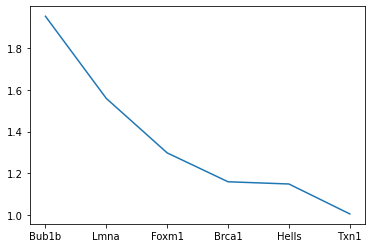

In [20]:
plt.plot(tab_common_IrrY_known.genename, tab_common_IrrY_known.log2_FC)

<AxesSubplot:xlabel='genename', ylabel='log2_FC'>

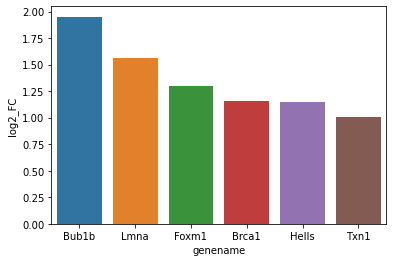

In [21]:
sns.barplot(x = 'genename', y = 'log2_FC', data = tab_common_IrrY_known, )

In [22]:
#Here we compare old mice gene changes after irradiation to the known aging assosiated gened
tab_common_IrrO_known = common_features(DesIrO, Known)
tab_common_IrrO_known

,GeneID,Base-mean,log2_FC,StdErr,Wald-Stats,P-value,P-adj,chr,start,stop,strand,NA,genename,name,lifespan effect,longevity influence
0,ENSMUSG00000025001,368.742514,1.028313,0.251187,4.093818,0.000042,0.001829,chr19,38930914,38971051,+,protein_coding,Hells,Proliferation associated SNF-2-like gene,Decrease,Pro-Longevity
1,ENSMUSG00000040084,136.872081,1.331002,0.369028,3.606775,0.000310,0.008344,chr2,118598210,118641591,+,protein_coding,Bub1b,budding uninhibited by benzimidazoles 1 homolo...,Increase and Decrease,Pro-Longevity
2,ENSMUSG00000017146,151.800552,1.208383,0.360195,3.354805,0.000794,0.016875,chr11,101488763,101551879,-,protein_coding,Brca1,Breast cancer 1,Decrease,Pro-Longevity


In [23]:
tab_common_IrrO_known.shape

(3, 16)

In [24]:
TabIY.head()

,geneid,na,genename,chr,log2_fc
0,ENSMUSG00000027469,protein_coding,Tpx2,chr2,2.762610
1,ENSMUSG00000020649,protein_coding,Rrm2,chr12,2.754824
2,ENSMUSG00000069267,protein_coding,Hist1h3b,chr13,2.613802
3,ENSMUSG00000041498,protein_coding,Kif14,chr1,2.496060
4,ENSMUSG00000009350,protein_coding,Mpo,chr11,2.494304


In [25]:
#Changing form of young mice vs irradiated for visualization
set_type = ['IR_Young' for _ in list(TabIY.genename)]
IY = pd.DataFrame({'set_type': set_type,
                   'genename': list(TabIY.genename),
                  'chr': list(TabIY.chr),
                  'log2FC': list(TabIY.log2_fc)})
IY.head()   

,set_type,genename,chr,log2FC
0,IR_Young,Tpx2,chr2,2.762610
1,IR_Young,Rrm2,chr12,2.754824
2,IR_Young,Hist1h3b,chr13,2.613802
3,IR_Young,Kif14,chr1,2.496060
4,IR_Young,Mpo,chr11,2.494304


In [26]:
set_type = ['IR_Old' for _ in list(TabIO.genename)]
IO = pd.DataFrame({'set_type': set_type,
                   'genename': list(TabIO.genename),
                  'chr': list(TabIO.chr),
                  'log2FC': list(TabIO.log2_fc)})
IO.head()

,set_type,genename,chr,log2FC
0,IR_Old,S1pr5,chr9,-3.917345
1,IR_Old,Fcgr2b,chr1,-3.793583
2,IR_Old,Fcgrt,chr7,-2.583433
3,IR_Old,Slamf6,chr1,2.415627
4,IR_Old,Snord17,chr2,-1.855653


In [27]:
set_type = []
for gene in list(IY.genename):
    if gene in list(tab_common_IrrY_known.genename):
        set_type.append('Young & aging')
    else:
        set_type.append('IR_Young')
        

IYA = pd.DataFrame({'set_type': set_type,
                   'genename': list(TabIY.genename),
                  'chr': list(TabIY.chr),
                  'log2FC': list(TabIY.log2_fc)})
IYA.head()   

,set_type,genename,chr,log2FC
0,IR_Young,Tpx2,chr2,2.762610
1,IR_Young,Rrm2,chr12,2.754824
2,IR_Young,Hist1h3b,chr13,2.613802
3,IR_Young,Kif14,chr1,2.496060
4,IR_Young,Mpo,chr11,2.494304


In [28]:
set_type = []
for gene in list(IO.genename):
    if gene in list(tab_common_IrrO_known.genename):
        set_type.append('Old & aging')
    else:
        set_type.append('IR_Old')
        

IOA = pd.DataFrame({'set_type': set_type,
                   'genename': list(TabIO.genename),
                  'chr': list(TabIO.chr),
                  'log2FC': list(TabIO.log2_fc)})
IOA.head()   

,set_type,genename,chr,log2FC
0,IR_Old,S1pr5,chr9,-3.917345
1,IR_Old,Fcgr2b,chr1,-3.793583
2,IR_Old,Fcgrt,chr7,-2.583433
3,IR_Old,Slamf6,chr1,2.415627
4,IR_Old,Snord17,chr2,-1.855653


In [29]:
common = pd.DataFrame()
common = pd.concat([IY, IO])
common.head()

,set_type,genename,chr,log2FC
0,IR_Young,Tpx2,chr2,2.762610
1,IR_Young,Rrm2,chr12,2.754824
2,IR_Young,Hist1h3b,chr13,2.613802
3,IR_Young,Kif14,chr1,2.496060
4,IR_Young,Mpo,chr11,2.494304


In [30]:
common1 = pd.DataFrame()
common1 = pd.concat([IYA, IOA])
common1.head()

,set_type,genename,chr,log2FC
0,IR_Young,Tpx2,chr2,2.762610
1,IR_Young,Rrm2,chr12,2.754824
2,IR_Young,Hist1h3b,chr13,2.613802
3,IR_Young,Kif14,chr1,2.496060
4,IR_Young,Mpo,chr11,2.494304


[Text(0.5, 1.0, 'Gene Expression Visualization, \n Irradiated vs Young, \n Irradiated vs Old')]

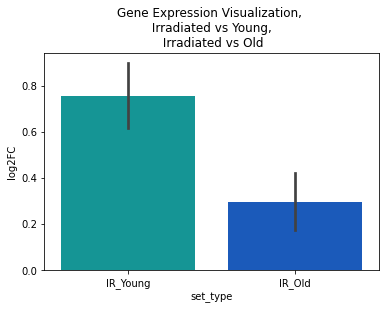

In [32]:
sns.barplot(x = 'set_type', y = 'log2FC', palette="winter_r", data = common).set(title='Gene Expression Visualization, '
                                    '\n Irradiated vs Young, \n Irradiated vs Old')

[Text(0.5, 1.0, 'Gene Expression Visualization, \n Irradiated vs Young, \n Irradiated vs Old \n common genes')]

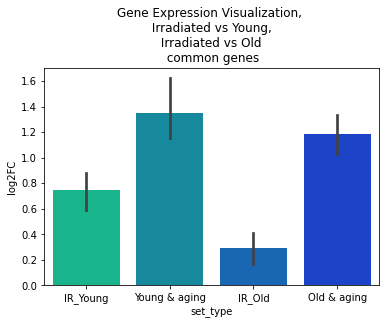

In [33]:
sns.barplot(x = 'set_type', y = 'log2FC', palette="winter_r", data = common1).set(title='Gene Expression Visualization, '
                                    '\n Irradiated vs Young, \n Irradiated vs Old \n common genes')

C:\Users\Irina\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Irina\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


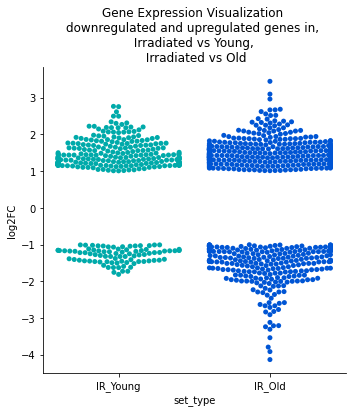

In [34]:
sns.catplot(data=common, x="set_type", y="log2FC", palette="winter_r", kind="swarm").set(title='Gene Expression Visualization \n'
                                    'downregulated and upregulated genes in, '
                                    '\n Irradiated vs Young, \n Irradiated vs Old')

C:\Users\Irina\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 45.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Irina\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 59.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


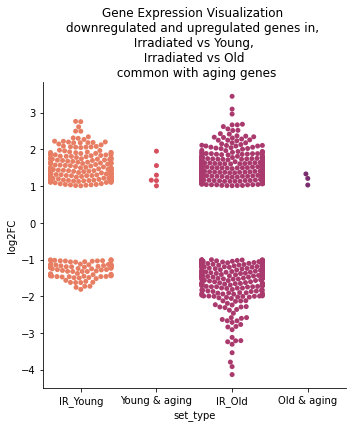

In [35]:
sns.catplot(data=common1, x="set_type", y="log2FC", palette= "flare", kind="swarm").set(title='Gene Expression Visualization \n'
                                    'downregulated and upregulated genes in, '
                                    '\n Irradiated vs Young, \n Irradiated vs Old \n common with aging genes')

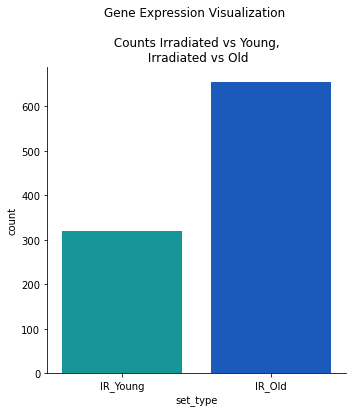

In [36]:
sns.catplot(data=common, x="set_type", kind="count", palette="winter_r").set(title='Gene Expression Visualization \n'
                                    '\n Counts Irradiated vs Young, \n Irradiated vs Old')

In [37]:
Known.head()

,genename,name,lifespan effect,longevity influence
5,Adcy5,adenylate cyclase 5,Increase,Anti-Longevity
12,Arhgap1,Rho GTPase activating protein 1,Decrease,Pro-Longevity
14,Arntl,aryl hydrocarbon receptor nuclear translocator...,Decrease,Pro-Longevity
23,Atm,Ataxia telangiectasia mutated homolog (human),Decrease,Pro-Longevity
29,Atr,Ataxia telangiectasia and Rad3 related,Decrease,Pro-Longevity


In [38]:
common1.head()

,set_type,genename,chr,log2FC
0,IR_Young,Tpx2,chr2,2.762610
1,IR_Young,Rrm2,chr12,2.754824
2,IR_Young,Hist1h3b,chr13,2.613802
3,IR_Young,Kif14,chr1,2.496060
4,IR_Young,Mpo,chr11,2.494304


In [39]:
df = common1.query('set_type == ["Young & aging", "Old & aging"]')

In [40]:
df = common_features(df, Known)
df.head()

,set_type,genename,chr,log2FC,name,lifespan effect,longevity influence
0,Young & aging,Bub1b,chr2,1.950900,budding uninhibited by benzimidazoles 1 homolo...,Increase and Decrease,Pro-Longevity
1,Old & aging,Bub1b,chr2,1.331002,budding uninhibited by benzimidazoles 1 homolo...,Increase and Decrease,Pro-Longevity
2,Young & aging,Lmna,chr3,1.558207,lamin A,Increase and Decrease,Unclear
3,Young & aging,Foxm1,chr6,1.297876,Forkhead box M1,Decrease,Pro-Longevity
4,Young & aging,Brca1,chr11,1.159835,Breast cancer 1,Decrease,Pro-Longevity


In [41]:
df.shape

(9, 7)

In [42]:
df.to_csv('For_aging_article_common_genes.csv')

In [43]:
# starting the same investigation with our aging groups


In [44]:
IY.head()


,set_type,genename,chr,log2FC
0,IR_Young,Tpx2,chr2,2.762610
1,IR_Young,Rrm2,chr12,2.754824
2,IR_Young,Hist1h3b,chr13,2.613802
3,IR_Young,Kif14,chr1,2.496060
4,IR_Young,Mpo,chr11,2.494304


In [45]:
IO.head()


,set_type,genename,chr,log2FC
0,IR_Old,S1pr5,chr9,-3.917345
1,IR_Old,Fcgr2b,chr1,-3.793583
2,IR_Old,Fcgrt,chr7,-2.583433
3,IR_Old,Slamf6,chr1,2.415627
4,IR_Old,Snord17,chr2,-1.855653


In [46]:
TabOY.head()

,geneid,na,genename,chr,log2_fc
0,ENSMUSG00000045087,protein_coding,S1pr5,chr9,5.777552
1,ENSMUSG00000035042,protein_coding,Ccl5,chr11,2.770172
2,ENSMUSG00000079071,protein_coding,Gm14085,chr2,-5.464127
3,ENSMUSG00000019982,protein_coding,Myb,chr10,-3.852188
4,ENSMUSG00000015133,protein_coding,Lrrk1,chr7,2.649684


In [47]:
set_type = ['Old_Young' for _ in list(TabOY.genename)]
OY = pd.DataFrame({'set_type': set_type,
                   'genename': list(TabOY.genename),
                  'chr': list(TabOY.chr),
                  'log2FC': list(TabOY.log2_fc)})
OY.head()

,set_type,genename,chr,log2FC
0,Old_Young,S1pr5,chr9,5.777552
1,Old_Young,Ccl5,chr11,2.770172
2,Old_Young,Gm14085,chr2,-5.464127
3,Old_Young,Myb,chr10,-3.852188
4,Old_Young,Lrrk1,chr7,2.649684


In [48]:
common2 = pd.DataFrame()
common2 = pd.concat([IY, IO, OY])
common2.head()

,set_type,genename,chr,log2FC
0,IR_Young,Tpx2,chr2,2.762610
1,IR_Young,Rrm2,chr12,2.754824
2,IR_Young,Hist1h3b,chr13,2.613802
3,IR_Young,Kif14,chr1,2.496060
4,IR_Young,Mpo,chr11,2.494304


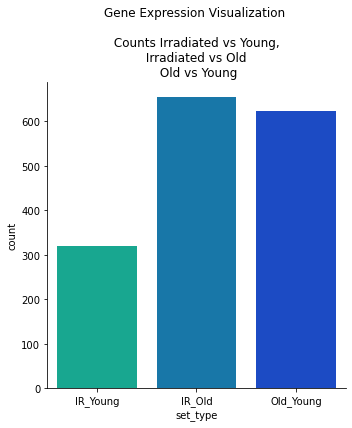

In [50]:
sns.catplot(data=common2, x="set_type", kind="count", palette="winter_r").set(title='Gene Expression Visualization \n'
                                    '\n Counts Irradiated vs Young, \n Irradiated vs Old \n Old vs Young')

C:\Users\Irina\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Irina\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 61.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Irina\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


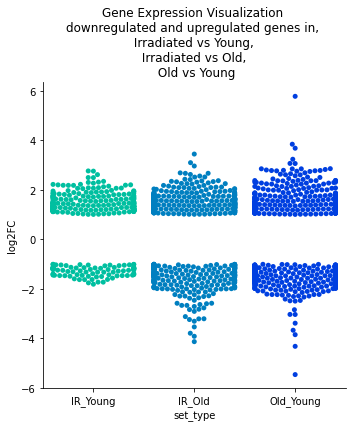

In [51]:
sns.catplot(data=common2, x="set_type", y="log2FC", palette="winter_r", kind="swarm").set(title='Gene Expression Visualization \n'
                                    'downregulated and upregulated genes in, '
                                    '\n Irradiated vs Young, \n Irradiated vs Old, \n Old vs Young')

In [52]:
IYA_our = common_features(TabIY, TabOY)
IYA_our.head()

,geneid_x,na_x,genename,chr_x,log2_fc_x,geneid_y,na_y,chr_y,log2_fc_y
0,ENSMUSG00000027469,protein_coding,Tpx2,chr2,2.762610,ENSMUSG00000027469,protein_coding,chr2,1.376781
1,ENSMUSG00000020649,protein_coding,Rrm2,chr12,2.754824,ENSMUSG00000020649,protein_coding,chr12,1.704617
2,ENSMUSG00000075031,protein_coding,Hist1h2bb,chr13,2.299734,ENSMUSG00000075031,protein_coding,chr13,1.544392
3,ENSMUSG00000020897,protein_coding,Aurkb,chr11,2.199540,ENSMUSG00000020897,protein_coding,chr11,1.437284
4,ENSMUSG00000030577,protein_coding,Cd22,chr7,2.070533,ENSMUSG00000030577,protein_coding,chr7,2.374580


In [53]:
IYA_our.shape

(55, 9)

In [54]:
TabIO.shape

(655, 5)

In [55]:
TabOY.shape

(624, 5)

In [56]:
OYA_our = common_features(TabOY, Known)
OYA_our.head()

,geneid,na,genename,chr,log2_fc,name,lifespan effect,longevity influence
0,ENSMUSG00000020027,protein_coding,Socs2,chr10,1.993898,Suppressor of cytokine signaling 2,Decrease,Pro-Longevity
1,ENSMUSG00000028063,protein_coding,Lmna,chr3,1.489414,lamin A,Increase and Decrease,Unclear
2,ENSMUSG00000034708,protein_coding,Grn,chr11,1.179037,granulin,Decrease,Pro-Longevity
3,ENSMUSG00000055116,protein_coding,Arntl,chr7,-1.130972,aryl hydrocarbon receptor nuclear translocator...,Decrease,Pro-Longevity


In [57]:
OYA_our.shape

(4, 8)

In [58]:
IOA_our = common_features(TabIO, TabOY)
IOA_our.head()

,geneid_x,na_x,genename,chr_x,log2_fc_x,geneid_y,na_y,chr_y,log2_fc_y
0,ENSMUSG00000045087,protein_coding,S1pr5,chr9,-3.917345,ENSMUSG00000045087,protein_coding,chr9,5.777552
1,ENSMUSG00000026656,protein_coding,Fcgr2b,chr1,-3.793583,ENSMUSG00000026656,protein_coding,chr1,3.842929
2,ENSMUSG00000003420,protein_coding,Fcgrt,chr7,-2.583433,ENSMUSG00000003420,protein_coding,chr7,2.366862
3,ENSMUSG00000015314,protein_coding,Slamf6,chr1,2.415627,ENSMUSG00000015314,protein_coding,chr1,-2.285209
4,ENSMUSG00000104291,TEC,A130071D04Rik,chr1,1.884201,ENSMUSG00000104291,TEC,chr1,-2.047935


In [59]:
IOA_our.shape

(328, 9)

In [60]:
set_type = []
for gene in list(TabIY.genename):
    if gene in list(IYA_our.genename):
        set_type.append('Young & aging')
    else:
        set_type.append('IR_Young')
        

IYA_OUR = pd.DataFrame({'set_type': set_type,
                   'genename': list(TabIY.genename),
                  'chr': list(TabIY.chr),
                  'log2FC': list(TabIY.log2_fc)})
IYA_OUR.head()   

,set_type,genename,chr,log2FC
0,Young & aging,Tpx2,chr2,2.762610
1,Young & aging,Rrm2,chr12,2.754824
2,IR_Young,Hist1h3b,chr13,2.613802
3,IR_Young,Kif14,chr1,2.496060
4,IR_Young,Mpo,chr11,2.494304


In [61]:
set_type = []
for gene in list(TabIO.genename):
    if gene in list(IOA_our.genename):
        set_type.append('Old & aging')
    else:
        set_type.append('IR_Old')
        

IOA_OUR = pd.DataFrame({'set_type': set_type,
                   'genename': list(TabIO.genename),
                  'chr': list(TabIO.chr),
                  'log2FC': list(TabIO.log2_fc)})

exclusion_of_old_spec = IOA_OUR.query('set_type == "IR_Old"')
exclusion_of_old_spec.head()   

,set_type,genename,chr,log2FC
4,IR_Old,Snord17,chr2,-1.855653
23,IR_Old,Fam46c,chr3,-1.652813
27,IR_Old,Zfp36l2,chr17,-1.345244
32,IR_Old,Gm24044,chr9,-1.403362
35,IR_Old,Afdn,chr17,-2.043807


In [62]:
common3 = pd.DataFrame()
common3 = pd.concat([IYA_OUR, exclusion_of_old_spec])
common3.head()

,set_type,genename,chr,log2FC
0,Young & aging,Tpx2,chr2,2.762610
1,Young & aging,Rrm2,chr12,2.754824
2,IR_Young,Hist1h3b,chr13,2.613802
3,IR_Young,Kif14,chr1,2.496060
4,IR_Young,Mpo,chr11,2.494304


In [63]:
common3.shape

(647, 4)

C:\Users\Irina\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Irina\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 24.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


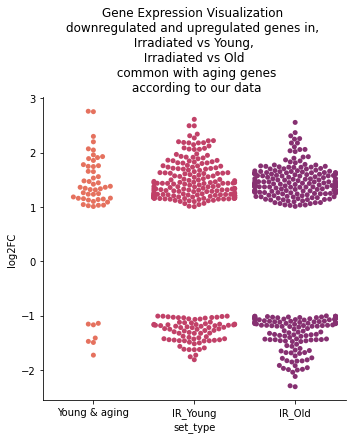

In [64]:
sns.catplot(data=common3, x="set_type", y="log2FC", palette= "flare", kind="swarm").set(title='Gene Expression Visualization \n'
                                    'downregulated and upregulated genes in, '
                                    '\n Irradiated vs Young, \n Irradiated vs Old \n common with aging genes' 
                                    '\n according to our data')

In [65]:
df1 = common3.query('set_type == ["Young & aging"]').merge(DesIrY[['genename', 'GeneID']], on = ['genename'])
df1.head() 

,set_type,genename,chr,log2FC,GeneID
0,Young & aging,Tpx2,chr2,2.762610,ENSMUSG00000027469
1,Young & aging,Rrm2,chr12,2.754824,ENSMUSG00000020649
2,Young & aging,Hist1h2bb,chr13,2.299734,ENSMUSG00000075031
3,Young & aging,Aurkb,chr11,2.199540,ENSMUSG00000020897
4,Young & aging,Cd22,chr7,2.070533,ENSMUSG00000030577


In [66]:
df1.shape

(55, 5)

In [67]:
annotation1 = An1_Ir_Y[['name', 'description', 'initial_alias']].rename(columns = {'name': 'genename', 
                                                                                     'initial_alias': 'GeneID'})
annotation1.head()

,genename,description,GeneID
0,9630013K17Rik,RIKEN cDNA 9630013K17 gene [Source:MGI Symbol;...,ENSMUSG00000086359
1,A630023P12Rik,RIKEN cDNA A630023P12 gene [Source:MGI Symbol;...,ENSMUSG00000048215
2,Afdn,"afadin, adherens junction formation factor [So...",ENSMUSG00000068036
3,Alad,"aminolevulinate, delta-, dehydratase [Source:M...",ENSMUSG00000028393
4,Alas2,"aminolevulinic acid synthase 2, erythroid [Sou...",ENSMUSG00000025270


In [68]:
df1 = pd.DataFrame(df1.merge(annotation1, on='GeneID'))
df1.head()

,set_type,genename_x,chr,log2FC,GeneID,genename_y,description
0,Young & aging,Tpx2,chr2,2.762610,ENSMUSG00000027469,Tpx2,"TPX2, microtubule-associated [Source:MGI Symbo..."
1,Young & aging,Rrm2,chr12,2.754824,ENSMUSG00000020649,Rrm2,ribonucleotide reductase M2 [Source:MGI Symbol...
2,Young & aging,Hist1h2bb,chr13,2.299734,ENSMUSG00000075031,H2bc3,H2B clustered histone 3 [Source:MGI Symbol;Acc...
3,Young & aging,Aurkb,chr11,2.199540,ENSMUSG00000020897,Aurkb,aurora kinase B [Source:MGI Symbol;Acc:MGI:107...
4,Young & aging,Cd22,chr7,2.070533,ENSMUSG00000030577,Cd22,CD22 antigen [Source:MGI Symbol;Acc:MGI:88322]


In [69]:
df1.shape

(55, 7)

In [70]:
df2 = df1[['set_type', 'genename_x', 'chr', 'log2FC', 'description']]

In [71]:
df2.shape

(55, 5)

In [72]:
df2.to_csv('Common-for_article_our_aging_data.csv')

In [73]:
# Version 3 with exclusion of data common for our aging differences from our Irradiated vs old dataset

In [74]:
DesIrY['genenameUp'] = DesIrY.genename.apply(lambda x: x.upper())
Aging_assoc2['genenameUp'] = Aging_assoc2.genename.apply(lambda x: x.upper())
tab_common_IrrY_known2 = pd.DataFrame(DesIrY.merge(Aging_assoc2, on = 'genenameUp'))
tab_common_IrrY_known2

,GeneID,Base-mean,log2_FC,StdErr,Wald-Stats,P-value,P-adj,chr,start,stop,strand,NA,genename_x,genenameUp,genename_y,Protein,MainPhysiologicalRole,ChangewithAgeorAbnormility
0,ENSMUSG00000028063,85.616025,1.558207,0.348879,4.466320,0.000008,0.000659,chr3,88481147,88509956,-,protein_coding,Lmna,LMNA,LMNA,Lamin A protein,"Regulation of antioxidant associated genes, Im...",Accelerated aging process
1,ENSMUSG00000027490,42.816126,1.346009,0.351303,3.831475,0.000127,0.006537,chr2,154559406,154569892,-,protein_coding,E2f1,E2F1,E2F1,E2F Transcription Factor 1,"Innate immune response, Regulation of metabolism",Cancers


In [75]:
DesIrO['genenameUp'] = DesIrO.genename.apply(lambda x: x.upper())
Aging_assoc2['genenameUp'] = Aging_assoc2.genename.apply(lambda x: x.upper())
tab_common_IrrO_known2 = pd.DataFrame(DesIrO.merge(Aging_assoc2, on = 'genenameUp'))
tab_common_IrrO_known2

,GeneID,Base-mean,log2_FC,StdErr,Wald-Stats,P-value,P-adj,chr,start,stop,strand,NA,genename_x,genenameUp,genename_y,Protein,MainPhysiologicalRole,ChangewithAgeorAbnormility
0,ENSMUSG00000045382,391.539185,-1.958059,0.212763,-9.202996,3.480000e-20,3.090000e-17,chr1,128588198,128592293,-,protein_coding,Cxcr4,CXCR4,CXCR4,C-X-C chemokine receptor type 4,Bone marrow physiology,Cancer


In [76]:
Known['genenameUp'] = Known.genename.apply(lambda x: x.upper())
Aging_assoc2['genenameUp'] = Aging_assoc2.genename.apply(lambda x: x.upper())
All_known2 = pd.DataFrame(Known.merge(Aging_assoc2, on = 'genenameUp'))
All_known2

,genename_x,name,lifespan effect,longevity influence,genenameUp,genename_y,Protein,MainPhysiologicalRole,ChangewithAgeorAbnormility
0,Atm,Ataxia telangiectasia mutated homolog (human),Decrease,Pro-Longevity,ATM,ATM,ATM serine/threonine kinase,Cellular response to genotoxic stress,"Lymphoid malignancies, Coronary artery disease"
1,Fgf23,Fibroblast growth factor 23,Decrease,Pro-Longevity,FGF23,FGF23,Fibroblast growth factor 23,Phosphate and vitamin D metabolism,Chronic kidney disease
2,Irs1,insulin receptor substrate 1,Increase,Anti-Longevity,IRS1,IRS1,Insulin receptor substrate 1,Insulin signaling,"Coronary artery disease, Tau pathology in alzh..."
3,Lmna,lamin A,Increase and Decrease,Unclear,LMNA,LMNA,Lamin A protein,"Regulation of antioxidant associated genes, Im...",Accelerated aging process
4,Neil1,nei endonuclease VIII-like 1 (E. coli),Decrease,Pro-Longevity,NEIL1,NEIL1,Nei like DNA Ggycosylase 1,"Neurogenesis, DNA repair, Neuronal protection ...",Alzheimers disease
5,Apoe,Apolipoprotein E,Decrease,Pro-Longevity,APOE,APOE,Apolipoprotein E,"Odulation of cholesterol balance, Aggregabilit...",Pathogenesis of atherosclerosis and in Alzheim...
6,Sod2,"Superoxide dismutase 2, mitochondrial",Decrease,Pro-Longevity,SOD2,SOD2,Superoxide dismutase 2,"Fights against oxidative stress, ROS scavenger","Alzeimers disease, diabetes, cardiac complica..."
7,Sirt1,Sirtuin 1 ((silent mating type information reg...,Increase and Decrease,Pro-Longevity,SIRT1,SIRT1,Sirtuin 1 protein,"Metabolism and energy homeostasis, DNA damage ...","Aging, cancer, Slow lipid metabolism"
8,Dgat1,diacylglycerol O-acyltransferase 1,Increase,Anti-Longevity,DGAT1,DGAT1,Diacylglycerol O -acyltransferase 1,"Triglyceride metabolism, Promote LDL levels",Congenital diarrheal disorder
9,Fgf21,fibroblast growth factor 21,Increase,Pro-Longevity,FGF21,FGF21,Fibroblast growth factor 21,lipolysis in adipose tissue,Cardiovascular disease


In [77]:
All_known2.shape

(11, 9)

In [78]:
MostChanged = DesIrY.query('abs(log2_FC) >= 2')
MostChanged.head()

,GeneID,Base-mean,log2_FC,StdErr,Wald-Stats,P-value,P-adj,chr,start,stop,strand,NA,genename,genenameUp
0,ENSMUSG00000027469,163.781578,2.762610,0.322521,8.565684,1.070000e-17,4.740000e-14,chr2,152847963,152895321,+,protein_coding,Tpx2,TPX2
1,ENSMUSG00000020649,125.830924,2.754824,0.330281,8.340845,7.380000e-17,2.440000e-13,chr12,24708240,24714146,+,protein_coding,Rrm2,RRM2
2,ENSMUSG00000069267,141.160404,2.613802,0.334909,7.804506,5.970000e-15,1.130000e-11,chr13,23752266,23752886,+,protein_coding,Hist1h3b,HIST1H3B
3,ENSMUSG00000041498,61.462571,2.496060,0.355664,7.018022,2.250000e-12,1.990000e-09,chr1,136467934,136531511,+,protein_coding,Kif14,KIF14
4,ENSMUSG00000009350,43.439063,2.494304,0.364874,6.836063,8.140000e-12,6.480000e-09,chr11,87793580,87804413,+,protein_coding,Mpo,MPO


In [79]:
combined1 = pd.DataFrame(MostChanged.merge(annotation1, on='GeneID'))[['genename_x', 'chr', 'description', 'log2_FC']]

combined1.head()

,genename_x,chr,description,log2_FC
0,Tpx2,chr2,"TPX2, microtubule-associated [Source:MGI Symbo...",2.762610
1,Rrm2,chr12,ribonucleotide reductase M2 [Source:MGI Symbol...,2.754824
2,Hist1h3b,chr13,H3 clustered histone 2 [Source:MGI Symbol;Acc:...,2.613802
3,Kif14,chr1,kinesin family member 14 [Source:MGI Symbol;Ac...,2.496060
4,Mpo,chr11,myeloperoxidase [Source:MGI Symbol;Acc:MGI:97137],2.494304


In [80]:
combined1.shape

(26, 4)

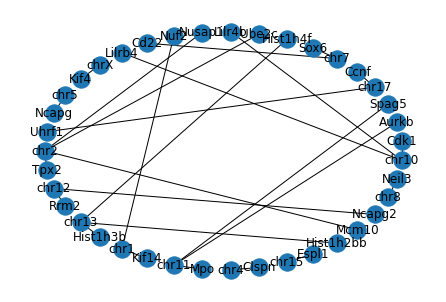

In [81]:
G = nx.cycle_graph(200)
G = nx.from_pandas_edgelist(combined1, 'chr', 'genename_x')
nx.draw_shell(G, with_labels=True)

In [7]:
g = nx.from_pandas_edgelist(combined, source = 'chr', target = 'genename_x')
pos = nx.circular_layout(g)
cmap = plt.cm.RdYlGn
colors = [n for n in range(len(g.nodes()))]
nx.draw_networkx(g, pos,  edge_color = 'grey', cmap = cmap, node_color = colors, font_size = 20, width = 2)
plt.title("Strongly affected by irradiation genes, Young mice, Log2FC >= 2", fontsize = 20)
plt.gcf().set_size_inches(15, 15)
plt.show()

In [84]:
MostChangedO = DesIrO.query('abs(log2_FC) >= 2')
MostChangedO.head()

,GeneID,Base-mean,log2_FC,StdErr,Wald-Stats,P-value,P-adj,chr,start,stop,strand,NA,genename,genenameUp
0,ENSMUSG00000045087,360.453918,-3.917345,0.281539,-13.914029,5.210000e-44,6.940000e-40,chr9,21242911,21248443,-,protein_coding,S1pr5,S1PR5
1,ENSMUSG00000026656,162.460975,-3.793583,0.316518,-11.985371,4.240000e-33,2.820000e-29,chr1,170958616,170976547,-,protein_coding,Fcgr2b,FCGR2B
2,ENSMUSG00000003420,895.482415,-2.583433,0.237638,-10.871290,1.580000e-27,7.010000e-24,chr7,45092989,45103851,-,protein_coding,Fcgrt,FCGRT
3,ENSMUSG00000015314,576.935293,2.415627,0.225404,10.716879,8.480000e-27,2.820000e-23,chr1,171917514,171953170,+,protein_coding,Slamf6,SLAMF6
6,ENSMUSG00000030247,166.927424,-3.209318,0.321158,-9.992959,1.640000e-23,3.110000e-20,chr6,142564836,142571614,-,protein_coding,Kcnj8,KCNJ8


In [85]:
annotation2 = An1_Ir_O[['name', 'description', 'initial_alias']].rename(columns = {'name': 'genename', 
                                                                                     'initial_alias': 'GeneID'})
annotation2.head()

,genename,description,GeneID
0,S1pr5,sphingosine-1-phosphate receptor 5 [Source:MGI...,ENSMUSG00000045087
1,Fcgr2b,"Fc receptor, IgG, low affinity IIb [Source:MGI...",ENSMUSG00000026656
2,Fcgrt,Fc fragment of IgG receptor and transporter [S...,ENSMUSG00000003420
3,Slamf6,SLAM family member 6 [Source:MGI Symbol;Acc:MG...,ENSMUSG00000015314
4,Snord17,"small nucleolar RNA, C/D box 17 [Source:MGI Sy...",ENSMUSG00000077714


In [86]:
combined2 = pd.DataFrame(MostChangedO.merge(annotation2, on='GeneID'))[['genename_x', 'chr', 'description', 'log2_FC']]

combined2.head()

,genename_x,chr,description,log2_FC
0,S1pr5,chr9,sphingosine-1-phosphate receptor 5 [Source:MGI...,-3.917345
1,Fcgr2b,chr1,"Fc receptor, IgG, low affinity IIb [Source:MGI...",-3.793583
2,Fcgrt,chr7,Fc fragment of IgG receptor and transporter [S...,-2.583433
3,Slamf6,chr1,SLAM family member 6 [Source:MGI Symbol;Acc:MG...,2.415627
4,Kcnj8,chr6,"potassium inwardly-rectifying channel, subfami...",-3.209318


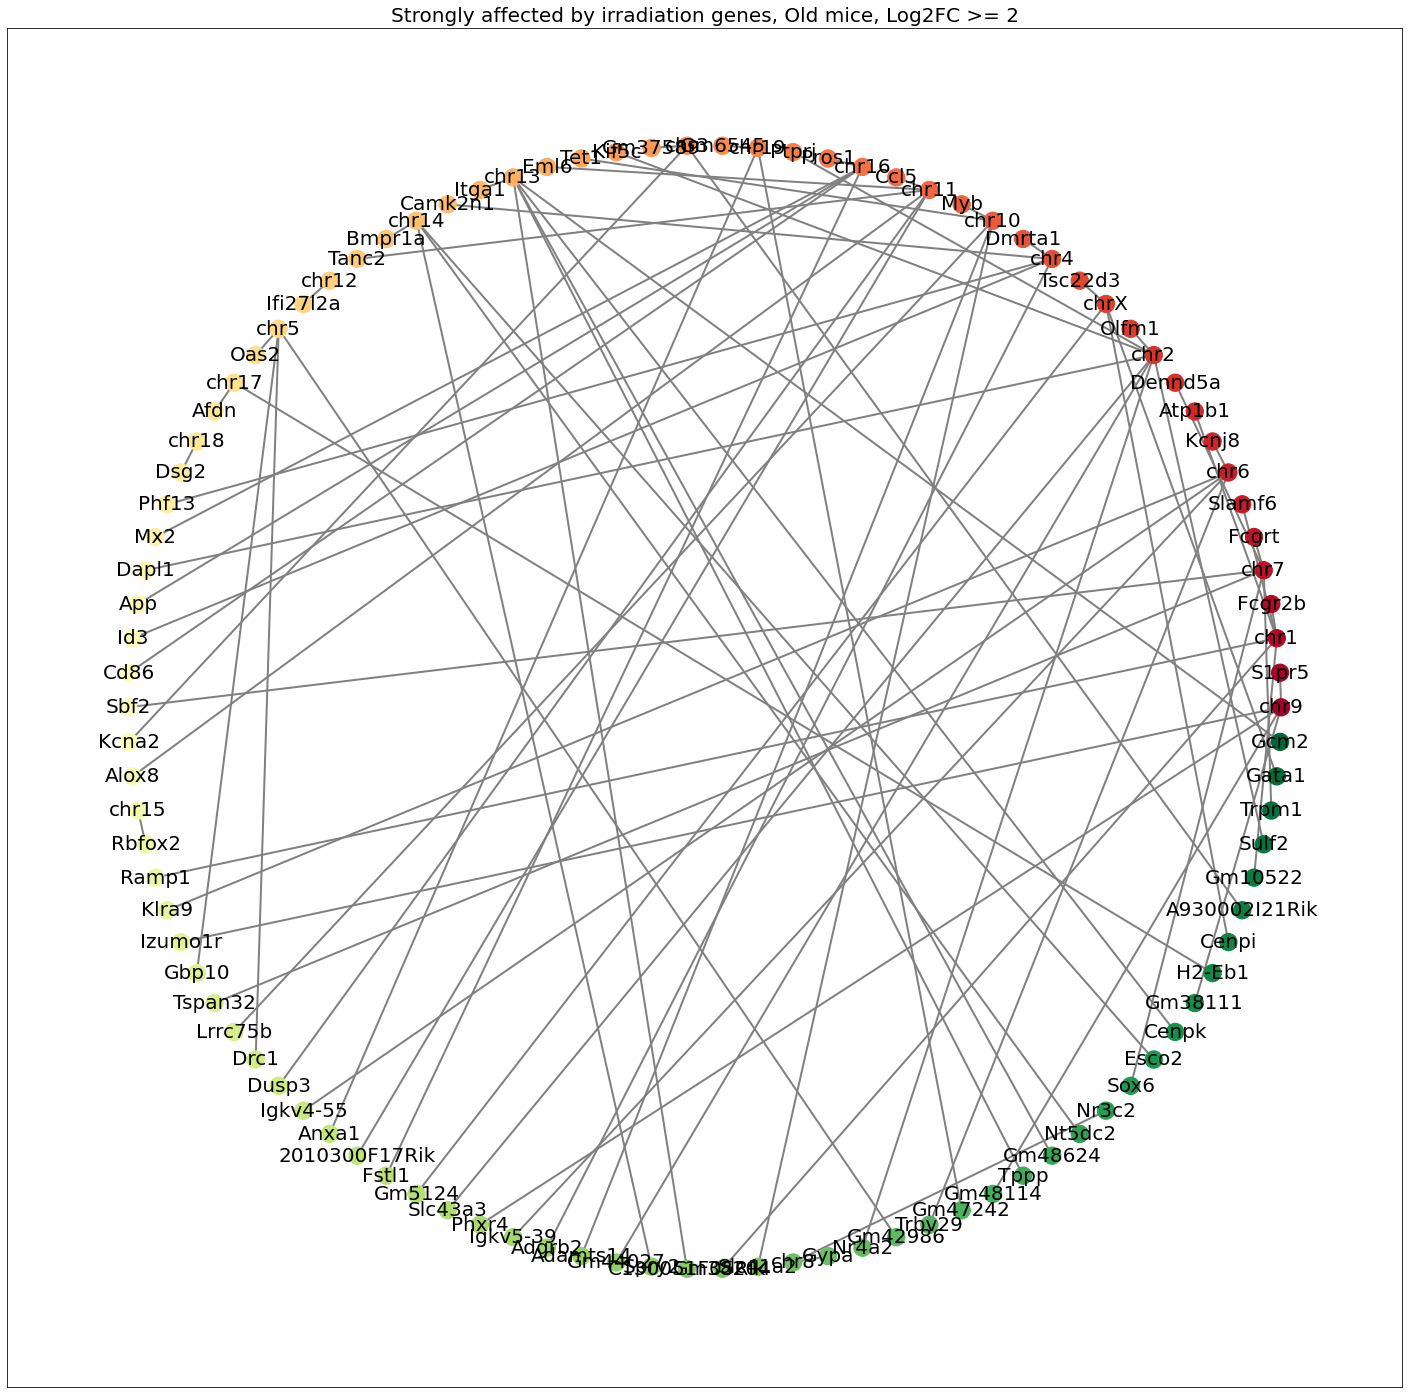

In [87]:
g = nx.from_pandas_edgelist(combined2, source = 'chr', target = 'genename_x')
pos = nx.circular_layout(g)
cmap = plt.cm.RdYlGn
colors = [n for n in range(len(g.nodes()))]
nx.draw_networkx(g, pos,  edge_color = 'grey', cmap = cmap, node_color = colors, font_size = 20, width = 2)
plt.title("Strongly affected by irradiation genes, Old mice, Log2FC >= 2", fontsize = 20)
plt.gcf().set_size_inches(25, 25)
plt.show()

In [88]:
combined1.head()

,genename_x,chr,description,log2_FC
0,Tpx2,chr2,"TPX2, microtubule-associated [Source:MGI Symbo...",2.762610
1,Rrm2,chr12,ribonucleotide reductase M2 [Source:MGI Symbol...,2.754824
2,Hist1h3b,chr13,H3 clustered histone 2 [Source:MGI Symbol;Acc:...,2.613802
3,Kif14,chr1,kinesin family member 14 [Source:MGI Symbol;Ac...,2.496060
4,Mpo,chr11,myeloperoxidase [Source:MGI Symbol;Acc:MGI:97137],2.494304


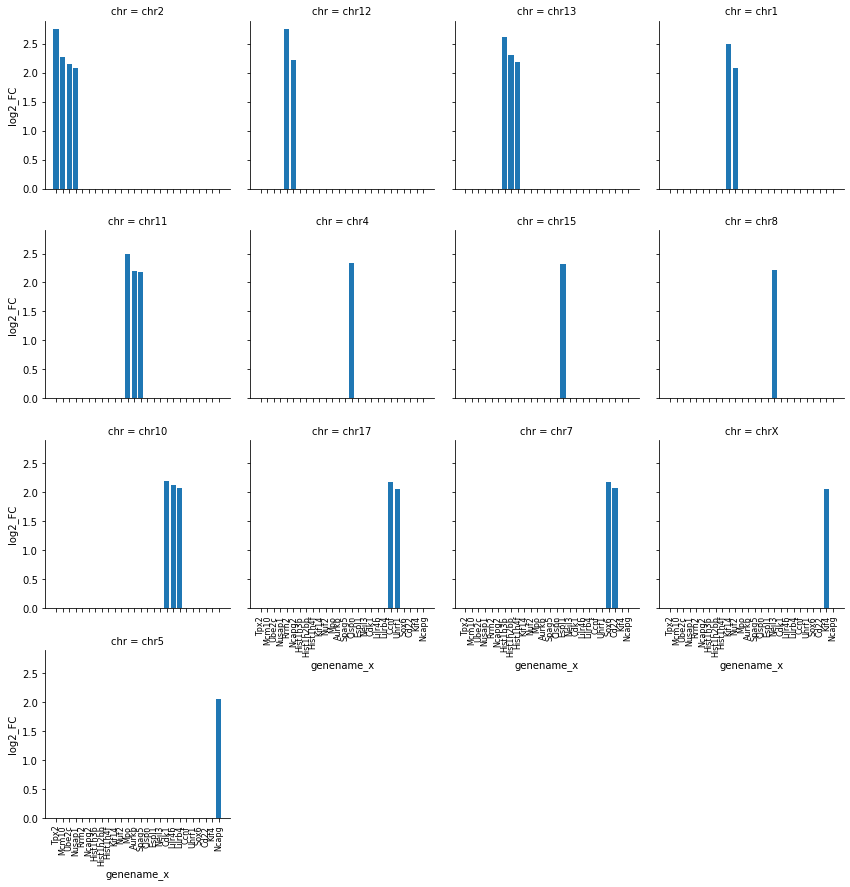

In [89]:

  
############# Main Section         #############
# Form a facetgrid using columns with a hue
graph = sns.FacetGrid(combined1, col ='chr', col_wrap=4)
# map the above form facetgrid with some attributes
graph.map(plt.bar, 'genename_x', 'log2_FC')
graph.set_xticklabels(rotation=90, fontsize = 8)
# show the object
plt.show()
  

In [90]:
combined1.dtypes

genename_x      object
chr             object
description     object
log2_FC        float64
dtype: object

In [91]:
combined1.head()

,genename_x,chr,description,log2_FC
0,Tpx2,chr2,"TPX2, microtubule-associated [Source:MGI Symbo...",2.762610
1,Rrm2,chr12,ribonucleotide reductase M2 [Source:MGI Symbol...,2.754824
2,Hist1h3b,chr13,H3 clustered histone 2 [Source:MGI Symbol;Acc:...,2.613802
3,Kif14,chr1,kinesin family member 14 [Source:MGI Symbol;Ac...,2.496060
4,Mpo,chr11,myeloperoxidase [Source:MGI Symbol;Acc:MGI:97137],2.494304


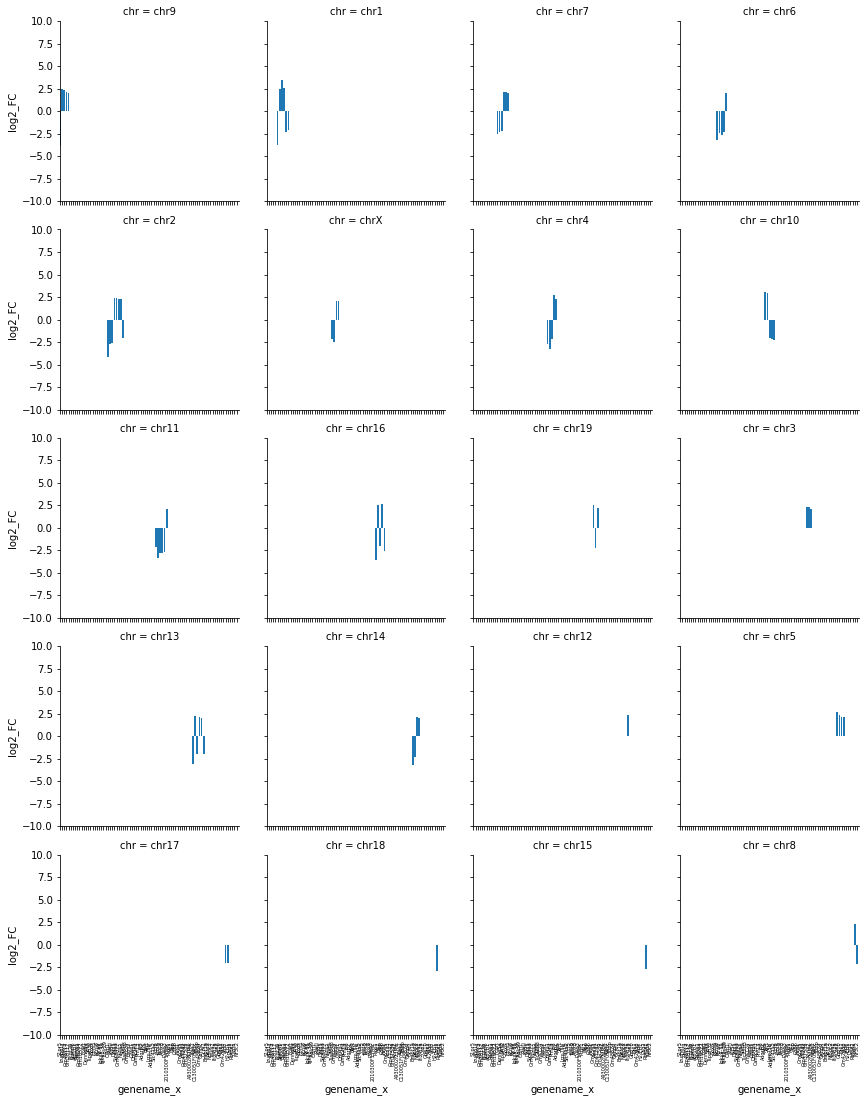

In [92]:
############# Main Section         #############
# Form a facetgrid using columns with a hue
graph = sns.FacetGrid(combined2, col ='chr', col_wrap=4, margin_titles=True)
# map the above form facetgrid with some attributes
graph.map(plt.bar, 'genename_x', 'log2_FC')
graph.set_xticklabels(rotation=90, fontsize = 5)
graph.set(xlim=(0, 82), ylim=(-10, 10))

# show the object
plt.show()

In [93]:
combined1.head()

,genename_x,chr,description,log2_FC
0,Tpx2,chr2,"TPX2, microtubule-associated [Source:MGI Symbo...",2.762610
1,Rrm2,chr12,ribonucleotide reductase M2 [Source:MGI Symbol...,2.754824
2,Hist1h3b,chr13,H3 clustered histone 2 [Source:MGI Symbol;Acc:...,2.613802
3,Kif14,chr1,kinesin family member 14 [Source:MGI Symbol;Ac...,2.496060
4,Mpo,chr11,myeloperoxidase [Source:MGI Symbol;Acc:MGI:97137],2.494304


In [94]:
combined2.shape

(82, 4)

In [95]:
combined1.to_csv('YoungL2FC_hight.csv')

In [96]:
combined2.to_csv('OldL2FC_hight.csv')

In [97]:
def summ_strings(lst):
    lst1 = ''
    for n in lst:
        lst1 += n + ' ; '
    return lst1    

In [98]:
def summ_strings1(lst):
    lst1 = ''
    for n in lst:
        n = n.split('[')[0]
        lst1 += n + ' ; '
        
    return lst1    

In [99]:
for_artic_young = combined1.groupby('chr', as_index=False).agg({'genename_x': summ_strings, 'description': summ_strings1})  #.value_counts('genename_x')
for_artic_young

,chr,genename_x,description
0,chr1,Kif14 ; Nuf2 ;,"kinesin family member 14 ; NUF2, NDC80 kineto..."
1,chr10,Cdk1 ; Lilr4b ; Lilrb4 ;,cyclin-dependent kinase 1 ; leukocyte immunog...
2,chr11,Mpo ; Aurkb ; Spag5 ;,myeloperoxidase ; aurora kinase B ; sperm as...
3,chr12,Rrm2 ; Ncapg2 ;,ribonucleotide reductase M2 ; non-SMC condens...
4,chr13,Hist1h3b ; Hist1h2bb ; Hist1h4f ;,H3 clustered histone 2 ; H2B clustered histon...
5,chr15,Espl1 ;,"extra spindle pole bodies 1, separase ;"
6,chr17,Ccnf ; Uhrf1 ;,"cyclin F ; ubiquitin-like, containing PHD and..."
7,chr2,Tpx2 ; Mcm10 ; Ube2c ; Nusap1 ;,"TPX2, microtubule-associated ; minichromosome..."
8,chr4,Clspn ;,claspin ;
9,chr5,Ncapg ;,"non-SMC condensin I complex, subunit G ;"


In [100]:
for_artic_young.to_csv('for_artic_youngDescription.csv')

In [101]:
for_artic_old = combined2.groupby('chr', as_index=False).agg({'genename_x': summ_strings, 'description': summ_strings})  #.value_counts('genename_x')
for_artic_old

,chr,genename_x,description
0,chr1,Fcgr2b ; Slamf6 ; Atp1b1 ; Ramp1 ; Gm38204 ; G...,"Fc receptor, IgG, low affinity IIb [Source:MGI..."
1,chr10,Myb ; Tet1 ; Lrrc75b ; Adamts14 ; Slc41a2 ;,myeloblastosis oncogene [Source:MGI Symbol;Acc...
2,chr11,Ccl5 ; Eml6 ; Tanc2 ; Alox8 ; Dusp3 ; 2010300F...,chemokine (C-C motif) ligand 5 [Source:MGI Sym...
3,chr12,Ifi27l2a ;,"interferon, alpha-inducible protein 27 like 2A..."
4,chr13,Itga1 ; C130051F05Rik ; Tppp ; Gm48624 ; Cenpk...,integrin alpha 1 [Source:MGI Symbol;Acc:MGI:96...
5,chr14,Bmpr1a ; Spry2 ; Nt5dc2 ; Esco2 ;,"bone morphogenetic protein receptor, type 1A [..."
6,chr15,Rbfox2 ;,"RNA binding protein, fox-1 homolog (C. elegans..."
7,chr16,Pros1 ; Mx2 ; App ; Cd86 ; Fstl1 ;,protein S (alpha) [Source:MGI Symbol;Acc:MGI:1...
8,chr17,Afdn ; H2-Eb1 ;,"afadin, adherens junction formation factor [So..."
9,chr18,Dsg2 ;,desmoglein 2 [Source:MGI Symbol;Acc:MGI:119646...


In [102]:
for_artic_old.to_csv('for_artic_oldDescription.csv')

In [103]:
combined1.tail(6)

,genename_x,chr,description,log2_FC
20,Nuf2,chr1,"NUF2, NDC80 kinetochore complex component [Sou...",2.080248
21,Cd22,chr7,CD22 antigen [Source:MGI Symbol;Acc:MGI:88322],2.070533
22,Lilrb4,chr10,"leukocyte immunoglobulin-like receptor, subfam...",2.065967
23,Kif4,chrX,kinesin family member 4 [Source:MGI Symbol;Acc...,2.062109
24,Ncapg,chr5,"non-SMC condensin I complex, subunit G [Source...",2.059472
25,Uhrf1,chr17,"ubiquitin-like, containing PHD and RING finger...",2.048765


In [118]:
combined1.shape

(26, 4)

In [115]:
combined2.shape

(82, 4)

In [105]:
combined2.description[1]

'Fc receptor, IgG, low affinity IIb [Source:MGI Symbol;Acc:MGI:95499]'

In [106]:
def summ_strings2(lst1, lst2):
    lst = []
    for el in lst2:
        el = str(el).split('[')[1]
        lst.append(el)
        stri = '' 
       
        for n1, el1 in enumerate(lst1):        
            for n2, el2 in enumerate(lst):            
                if n1 == n2:
                    stri += el1 + '-' + el2 + '; '
    print(lst)            
    return stri 

# str(n1 + 1) + '. ' + 

In [107]:
list1young = summ_strings2(combined1[['genename_x']].values, combined1[['description']].values)
list1young


["'TPX2, microtubule-associated ", "'ribonucleotide reductase M2 ", "'H3 clustered histone 2 ", "'kinesin family member 14 ", "'myeloperoxidase ", "'claspin ", "'extra spindle pole bodies 1, separase ", "'H2B clustered histone 3 ", "'minichromosome maintenance 10 replication initiation factor ", "'non-SMC condensin II complex, subunit G2 ", "'nei like 3 (E. coli) ", "'cyclin-dependent kinase 1 ", "'aurora kinase B ", "'sperm associated antigen 5 ", "'cyclin F ", "'SRY (sex determining region Y)-box 6 ", "'H4 clustered histone 6 ", "'ubiquitin-conjugating enzyme E2C ", "'leukocyte immunoglobulin-like receptor, subfamily B, member 4B ", "'nucleolar and spindle associated protein 1 ", "'NUF2, NDC80 kinetochore complex component ", "'CD22 antigen ", "'leukocyte immunoglobulin-like receptor, subfamily B, member 4A ", "'kinesin family member 4 ", "'non-SMC condensin I complex, subunit G ", "'ubiquitin-like, containing PHD and RING finger domains, 1 "]


array(["Tpx2-'TPX2, microtubule-associated ; Rrm2-'ribonucleotide reductase M2 ; Hist1h3b-'H3 clustered histone 2 ; Kif14-'kinesin family member 14 ; Mpo-'myeloperoxidase ; Clspn-'claspin ; Espl1-'extra spindle pole bodies 1, separase ; Hist1h2bb-'H2B clustered histone 3 ; Mcm10-'minichromosome maintenance 10 replication initiation factor ; Ncapg2-'non-SMC condensin II complex, subunit G2 ; Neil3-'nei like 3 (E. coli) ; Cdk1-'cyclin-dependent kinase 1 ; Aurkb-'aurora kinase B ; Spag5-'sperm associated antigen 5 ; Ccnf-'cyclin F ; Sox6-'SRY (sex determining region Y)-box 6 ; Hist1h4f-'H4 clustered histone 6 ; Ube2c-'ubiquitin-conjugating enzyme E2C ; Lilr4b-'leukocyte immunoglobulin-like receptor, subfamily B, member 4B ; Nusap1-'nucleolar and spindle associated protein 1 ; Nuf2-'NUF2, NDC80 kinetochore complex component ; Cd22-'CD22 antigen ; Lilrb4-'leukocyte immunoglobulin-like receptor, subfamily B, member 4A ; Kif4-'kinesin family member 4 ; Ncapg-'non-SMC condensin I complex, subu

In [108]:
list1old = summ_strings2(combined2[['genename_x']].values, combined2[['description']].values)
list1old

["'sphingosine-1-phosphate receptor 5 ", "'Fc receptor, IgG, low affinity IIb ", "'Fc fragment of IgG receptor and transporter ", "'SLAM family member 6 ", "'potassium inwardly-rectifying channel, subfamily J, member 8 ", "'ATPase, Na+/K+ transporting, beta 1 polypeptide ", "'DENN/MADD domain containing 5A ", "'olfactomedin 1 ", "'TSC22 domain family, member 3 ", "'doublesex and mab-3 related transcription factor like family A1 ", "'myeloblastosis oncogene ", "'chemokine (C-C motif) ligand 5 ", "'protein S (alpha) ", "'protein tyrosine phosphatase, receptor type, J ", "'predicted gene 6545 ", "'predicted gene, 37589 ", "'kinesin family member 5C ", "'tet methylcytosine dioxygenase 1 ", "'echinoderm microtubule associated protein like 6 ", "'integrin alpha 1 ", "'calcium/calmodulin-dependent protein kinase II inhibitor 1 ", "'bone morphogenetic protein receptor, type 1A ", "'tetratricopeptide repeat, ankyrin repeat and coiled-coil containing 2 ", "'interferon, alpha-inducible protein 27

array(['S1pr5-\'sphingosine-1-phosphate receptor 5 ; Fcgr2b-\'Fc receptor, IgG, low affinity IIb ; Fcgrt-\'Fc fragment of IgG receptor and transporter ; Slamf6-\'SLAM family member 6 ; Kcnj8-\'potassium inwardly-rectifying channel, subfamily J, member 8 ; Atp1b1-\'ATPase, Na+/K+ transporting, beta 1 polypeptide ; Dennd5a-\'DENN/MADD domain containing 5A ; Olfm1-\'olfactomedin 1 ; Tsc22d3-\'TSC22 domain family, member 3 ; Dmrta1-\'doublesex and mab-3 related transcription factor like family A1 ; Myb-\'myeloblastosis oncogene ; Ccl5-\'chemokine (C-C motif) ligand 5 ; Pros1-\'protein S (alpha) ; Ptprj-\'protein tyrosine phosphatase, receptor type, J ; Gm6545-\'predicted gene 6545 ; Gm37589-\'predicted gene, 37589 ; Kif5c-\'kinesin family member 5C ; Tet1-\'tet methylcytosine dioxygenase 1 ; Eml6-\'echinoderm microtubule associated protein like 6 ; Itga1-\'integrin alpha 1 ; Camk2n1-\'calcium/calmodulin-dependent protein kinase II inhibitor 1 ; Bmpr1a-\'bone morphogenetic protein receptor,

In [159]:
list1old[0]

'S1pr5-\'sphingosine-1-phosphate receptor 5 ; Fcgr2b-\'Fc receptor, IgG, low affinity IIb ; Fcgrt-\'Fc fragment of IgG receptor and transporter ; Slamf6-\'SLAM family member 6 ; Kcnj8-\'potassium inwardly-rectifying channel, subfamily J, member 8 ; Atp1b1-\'ATPase, Na+/K+ transporting, beta 1 polypeptide ; Dennd5a-\'DENN/MADD domain containing 5A ; Olfm1-\'olfactomedin 1 ; Tsc22d3-\'TSC22 domain family, member 3 ; Dmrta1-\'doublesex and mab-3 related transcription factor like family A1 ; Myb-\'myeloblastosis oncogene ; Ccl5-\'chemokine (C-C motif) ligand 5 ; Pros1-\'protein S (alpha) ; Ptprj-\'protein tyrosine phosphatase, receptor type, J ; Gm6545-\'predicted gene 6545 ; Gm37589-\'predicted gene, 37589 ; Kif5c-\'kinesin family member 5C ; Tet1-\'tet methylcytosine dioxygenase 1 ; Eml6-\'echinoderm microtubule associated protein like 6 ; Itga1-\'integrin alpha 1 ; Camk2n1-\'calcium/calmodulin-dependent protein kinase II inhibitor 1 ; Bmpr1a-\'bone morphogenetic protein receptor, type 1

In [136]:
old = ['S1pr5 - sphingosine-1-phosphate receptor 5', 'Fcgr2b - Fc receptor, IgG, low affinity IIb', 
       'Fcgrt - Fc fragment of IgG receptor and transporter', 
       'Slamf6 - SLAM family member 6', 'Kcnj8 - potassium inwardly-rectifying channel, subfamily J, member 8', 
       'Atp1b1 - ATPase, Na+/K+ transporting, beta 1 polypeptide', 'Dennd5a - DENN/MADD domain containing 5A', 
       'Olfm1 - olfactomedin 1', 'Tsc22d3 - TSC22 domain family, member 3', 
       'Dmrta1 - doublesex and mab-3 related transcription factor like family A1', 'Myb - myeloblastosis oncogene', 
       'Ccl5 - chemokine (C-C motif) ligand 5', 'Pros1 - protein S (alpha)', 'Ptprj - protein tyrosine phosphatase, receptor type, J',
       'Gm6545 - predicted gene 6545', 'Gm37589 - predicted gene, 37589', 'Kif5c - kinesin family member 5C',  
       'Tet1 - tet methylcytosine dioxygenase 1',  'Eml6 - echinoderm microtubule associated protein like 6', 
       'Itga1 - integrin alpha 1', 'Camk2n1 - calcium/calmodulin-dependent protein kinase II inhibitor 1',  
       'Bmpr1a - bone morphogenetic protein receptor, type 1A', 
       'Tanc2 - tetratricopeptide repeat, ankyrin repeat and coiled-coil containing 2', 
       'Ifi27l2a - interferon, alpha-inducible protein 27 like 2A',  'Oas2 - 2-5 oligoadenylate synthetase', 
       'Afdn - afadin, adherens junction formation factor', 'Dsg2 - desmoglein 2', 'Phf13 - PHD finger protein 13', 
       'Mx2 - MX dynamin-like GTPase 2',  'Dapl1 - death associated protein-like 1', 'App - amyloid beta (A4) precursor protein', 
       'Id3 - inhibitor of DNA binding 3', 'Cd86 - CD86 antigen', 'Sbf2 - SET binding factor 2', 
       'Kcna2 - potassium voltage-gated channel, shaker-related subfamily, member 2', 'Alox8 - arachidonate 8-lipoxygenase',  
       'Rbfox2 - RNA binding protein, fox-1 homolog (C. elegans) 2', 'Ramp1 - receptor (calcitonin) activity modifying protein 1', 
       'Klra9 - killer cell lectin-like receptor subfamily A, member 9', 'Izumo1r - IZUMO1 receptor, JUNO',  
       'Gbp10 - guanylate-binding protein 10', 'Tspan32 - tetraspanin 32',  'Lrrc75b - leucine rich repeat containing 75B',  
       'Drc1 - dynein regulatory complex subunit 1', 'Dusp3 - dual specificity phosphatase 3 (vaccinia virus phosphatase VH1-related)',
       'Igkv4-55 - immunoglobulin kappa variable 4-55', 'Anxa1 - annexin A1', '2010300F17Rik -/None/', 
       'Fstl1 - follistatin-like 1', 'Gm5124 - predicted pseudogene 5124', 'Slc43a3 - solute carrier family 43, member 3', 
       'Phxr4 - per-hexamer repeat gene 4', 'Igkv5-39 - immunoglobulin kappa variable 5-39', 
       'Adgrb2 - adhesion G protein-coupled receptor B2', 
       'Adamts14 - a disintegrin-like and metallopeptidase (reprolysin type) with thrombospondin type 1 motif, 14', 
       'Gm44027 - predicted gene, 44027', 'Spry2 - sprouty RTK signaling antagonist 2',  
       'C130051F05Rik - RIKEN cDNA C130051F05 gene',  'Gm38204 - predicted gene, 38204',  
       'Slc41a2 - solute carrier family 41, member 2', 'Gypa - glycophorin A', 
       'Nr4a2 - nuclear receptor subfamily 4, group A, member 2', 'Gm42986 -  predicted gene 42986', 
       'Trbv29 - T cell receptor beta, variable 29', 'Gm47242 - predicted gene, 47242', 'Gm48114 - predicted gene, 48114', 
       'Tppp - tubulin polymerization promoting protein', 'Gm48624 - predicted gene, 48624',  
       'Nt5dc2 -"5 -nucleotidase domain containing 2',  'Nr3c2 - nuclear receptor subfamily 3, group C, member 2', 
       'Sox6 - SRY (sex determining region Y)-box 6', 
       'Esco2 - establishment of sister chromatid cohesion N-acetyltransferase 2', 'Cenpk - centromere protein K', 
       'Gm38111 - predicted gene, 38111',  'H2-Eb1 - histocompatibility 2, class II antigen E beta', 
       'Cenpi - centromere protein I', 'A930002I21Rik - RIKEN cDNA A930002I21 gene', 
       'Gm10522 - predicted gene 10522', 'Sulf2 - sulfatase 2', 
       'Trpm1 - transient receptor potential cation channel, subfamily M, member 1', 
       'Gata1 - GATA binding protein 1', 'Gcm2 - glial cells missing homolog 2']

In [137]:
len(old)

82

In [138]:
young = ['Tpx2 - TPX2, microtubule-associated', 'Rrm2 - ribonucleotide reductase M2', 
         'Hist1h3b - H3 clustered histone 2', 'Kif14 - kinesin family member 14', 'Mpo - myeloperoxidase', 
         'Clspn - claspin', 'Espl1 - extra spindle pole bodies 1, separase', 'Hist1h2bb - H2B clustered histone 3', 
         'Mcm10 - minichromosome maintenance 10 replication initiation factor', 
         'Ncapg2 - non-SMC condensin II complex, subunit G2', 'Neil3 - nei like 3 (E. coli)', 
         'Cdk1 - cyclin-dependent kinase 1', 'Aurkb - aurora kinase B', 'Spag5 - sperm associated antigen 5', 
         'Ccnf - cyclin F', 'Sox6 - SRY (sex determining region Y)-box 6', 'Hist1h4f - H4 clustered histone 6', 
         'Ube2c - ubiquitin-conjugating enzyme E2C', 
         'Lilr4b - leukocyte immunoglobulin-like receptor, subfamily B, member 4B', 
         'Nusap1 - nucleolar and spindle associated protein 1', 'Nuf2 - NUF2, NDC80 kinetochore complex component', 
         'Cd22 - CD22 antigen', 'Lilrb4 - leukocyte immunoglobulin-like receptor, subfamily B, member 4A', 
         'Kif4 - kinesin family member 4', 'Ncapg - non-SMC condensin I complex, subunit G', 
         'Uhrf1 - ubiquitin-like, containing PHD and RING finger domains, 1']

In [122]:
len(young)

26

In [139]:
old.extend(young)
for_tab = old

In [140]:
len(for_tab)

108

In [141]:
for_tab = set(for_tab)

In [142]:
len(for_tab)

107

In [143]:
for_tab

{'2010300F17Rik -/None/',
 'A930002I21Rik - RIKEN cDNA A930002I21 gene',
 'Adamts14 - a disintegrin-like and metallopeptidase (reprolysin type) with thrombospondin type 1 motif, 14',
 'Adgrb2 - adhesion G protein-coupled receptor B2',
 'Afdn - afadin, adherens junction formation factor',
 'Alox8 - arachidonate 8-lipoxygenase',
 'Anxa1 - annexin A1',
 'App - amyloid beta (A4) precursor protein',
 'Atp1b1 - ATPase, Na+/K+ transporting, beta 1 polypeptide',
 'Aurkb - aurora kinase B',
 'Bmpr1a - bone morphogenetic protein receptor, type 1A',
 'C130051F05Rik - RIKEN cDNA C130051F05 gene',
 'Camk2n1 - calcium/calmodulin-dependent protein kinase II inhibitor 1',
 'Ccl5 - chemokine (C-C motif) ligand 5',
 'Ccnf - cyclin F',
 'Cd22 - CD22 antigen',
 'Cd86 - CD86 antigen',
 'Cdk1 - cyclin-dependent kinase 1',
 'Cenpi - centromere protein I',
 'Cenpk - centromere protein K',
 'Clspn - claspin',
 'Dapl1 - death associated protein-like 1',
 'Dennd5a - DENN/MADD domain containing 5A',
 'Dmrta1 - do